In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

sns.set(style='ticks', palette='Set2')
%matplotlib inline



In [3]:
import os
os.getcwd()

'C:\\Users\\Faizan\\OneDrive\\OneDrive\\Statistical Cnslt and Tutoring\\ML_Jewerly_Clustering'

In [4]:
#Import the Jewelry data set. 

df_jc = pd.read_csv('jewelry_customers.csv')
print(df_jc.head())
print(df_jc.shape)

   Age  Income  SpendingScore       Savings
0   58   77769       0.791329   6559.829923
1   59   81799       0.791082   5417.661426
2   62   74751       0.702657   9258.992965
3   59   74373       0.765680   7346.334504
4   87   17760       0.348778  16869.507130
(505, 4)


In [5]:
print(df_jc.describe())

              Age         Income  SpendingScore       Savings
count  505.000000     505.000000     505.000000    505.000000
mean    59.019802   75513.291089       0.505083  11862.455867
std     24.140043   35992.922184       0.259634   4949.229253
min     17.000000   12000.000000       0.000000      0.000000
25%     34.000000   34529.000000       0.304792   6828.709702
50%     59.000000   75078.000000       0.368215  14209.932802
75%     85.000000  107100.000000       0.768279  16047.268331
max     97.000000  142000.000000       1.000000  20000.000000


In [6]:
print(df_jc.isna().sum())

Age              0
Income           0
SpendingScore    0
Savings          0
dtype: int64


In [6]:
## If there were any missning data this is how we will fill them with the column means.

# df_jc.fillna(df_jc.mean(), inplace=True)

In [7]:
# Looking at what we will be inputting into our kmeans model.

df_jc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
Age              505 non-null int64
Income           505 non-null int64
SpendingScore    505 non-null float64
Savings          505 non-null float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


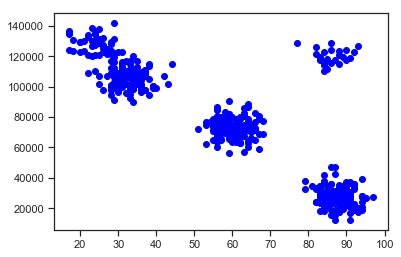

In [8]:
# Look at the plot of a few of the variables. 

plt.scatter(df_jc['Age'], df_jc['Income'], color = 'blue')

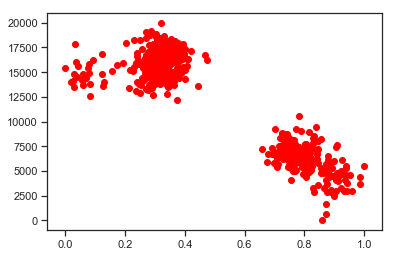

In [9]:
plt.scatter(df_jc['SpendingScore'], df_jc['Savings'], color = 'red')

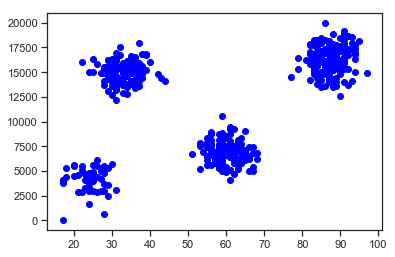

In [10]:
plt.scatter(df_jc['Age'], df_jc['Savings'], color = 'blue')

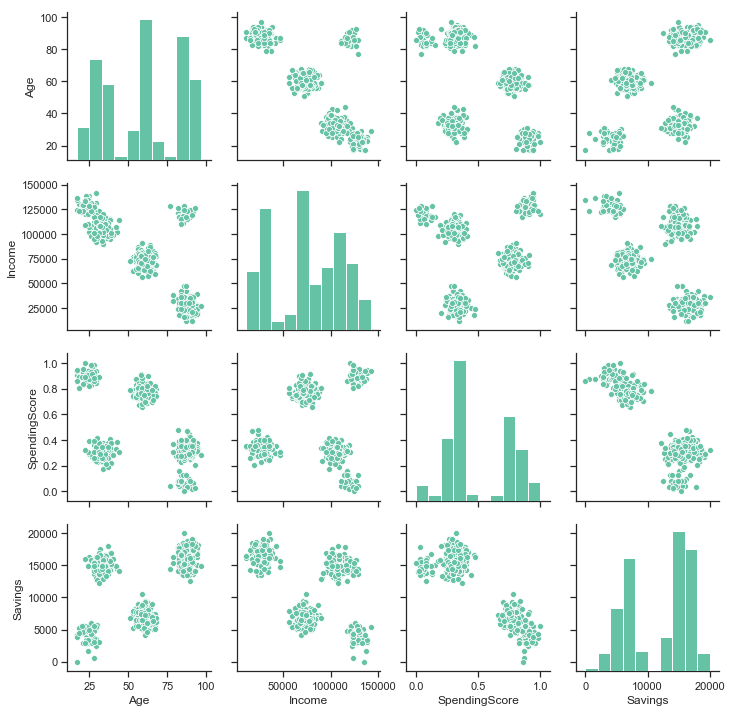

In [11]:
# Plot pairwise plots to see how things look. 

sns.pairplot(df_jc)

# From the plots below it appears that there are 4, maybe 5, clusters in this data set. 

In [15]:
# Building our Kmeans model.

#k = 5
#model_k2 = KMeans(n_clusters = k)
#model_k2_results = model_k2.fit(df_jc)


kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_jc)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [16]:
y_kmeans = kmeans.predict(df_jc)

In [17]:
y_kmeans

array([2, 2, 2, 2, 0, 4, 2, 0, 0, 0, 3, 1, 1, 3, 2, 4, 2, 0, 0, 3, 1, 4,
       2, 0, 3, 4, 4, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 1, 3, 2, 0, 4, 2,
       2, 4, 3, 4, 1, 2, 0, 1, 4, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 4, 4, 2, 2, 3, 0, 0, 3, 2, 1, 2, 2, 4, 2, 3, 1, 0, 0, 1, 1, 2,
       2, 2, 2, 2, 4, 0, 2, 4, 1, 2, 2, 3, 3, 4, 3, 4, 1, 0, 0, 3, 3, 2,
       0, 1, 2, 1, 1, 1, 2, 3, 4, 0, 1, 0, 0, 0, 3, 3, 2, 0, 2, 2, 3, 2,
       1, 2, 4, 0, 4, 4, 2, 3, 0, 2, 2, 4, 2, 4, 2, 4, 2, 0, 2, 3, 0, 2,
       0, 3, 3, 2, 0, 2, 3, 0, 2, 1, 0, 1, 0, 2, 3, 2, 0, 2, 1, 2, 0, 2,
       2, 0, 0, 0, 2, 2, 3, 4, 4, 0, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 4, 3,
       0, 0, 0, 1, 2, 1, 2, 3, 2, 0, 4, 2, 0, 0, 0, 0, 2, 0, 1, 4, 1, 0,
       2, 2, 3, 0, 3, 4, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 3, 1, 4, 2,
       2, 2, 3, 2, 3, 0, 4, 4, 4, 0, 2, 3, 0, 0, 1, 3, 2, 2, 3, 2, 2, 0,
       2, 0, 3, 4, 2, 3, 0, 2, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1, 3, 4, 3, 0,
       0, 1, 3, 0, 0, 4, 2, 3, 3, 2, 3, 0, 0, 1, 2,

In [18]:
# However, we should scale the data set first. 

# Another scalling method, perhaps it is better
#
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

#print('shape for training dataset:', X_train.shape)
#print('shape for testing dataset:', X_test.shape)

# This should be normalization method
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_jc_scaled = scaler.fit_transform(df_jc)

#scaler2 = MinMaxScaler()
#df_jc_scaled_minmax = scaler2.fit_transform(df_jc)
#df_jc_scaled_minmax = MinMaxScaler().fit_transform(df_jc)


print('shape for testing dataset:', df_jc_scaled)
print(df_jc_scaled.shape)
# This MinMax method perhaps is not as appropriate as the normalization method. 
#scaler = MinMaxScaler()
#df_jc_scaled = scaler.fit_transform(df_jc)

print(df_jc_scaled.info)

shape for testing dataset: [[-4.22871323e-02  6.27330450e-02  1.10359261e+00 -1.07246676e+00]
 [-8.21109365e-04  1.74810526e-01  1.10264136e+00 -1.30347264e+00]
 [ 1.23576959e-01 -2.11999168e-02  7.61727378e-01 -5.26555609e-01]
 ...
 [ 1.28462560e+00 -1.11844679e+00 -5.78054216e-01  8.55312853e-01]
 [ 1.32609162e+00 -1.52492929e+00 -5.79865675e-01  1.32245159e+00]
 [ 1.24315958e+00 -1.25833506e+00 -8.31889623e-01  5.10463045e-01]]
(505, 4)


C:\Users\Faizan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Faizan\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [15]:
print(df_jc_scaled)

[[-4.22871323e-02  6.27330450e-02  1.10359261e+00 -1.07246676e+00]
 [-8.21109365e-04  1.74810526e-01  1.10264136e+00 -1.30347264e+00]
 [ 1.23576959e-01 -2.11999168e-02  7.61727378e-01 -5.26555609e-01]
 ...
 [ 1.28462560e+00 -1.11844679e+00 -5.78054216e-01  8.55312853e-01]
 [ 1.32609162e+00 -1.52492929e+00 -5.79865675e-01  1.32245159e+00]
 [ 1.24315958e+00 -1.25833506e+00 -8.31889623e-01  5.10463045e-01]]


In [16]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_jc_scaled)
    Sum_of_squared_distances.append(km.inertia_)

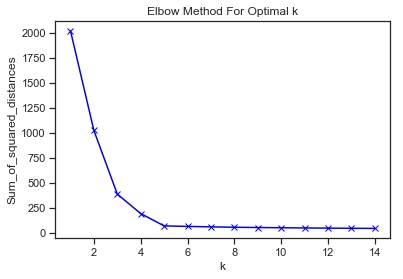

In [17]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [18]:
# In the plot above the elbow is at k=4 indicating the optimal k for this dataset is 4 which concurres with what we observed
# in the pairwise plots.

In [19]:
# We will now perform clustering using k=4 clusters

kms = KMeans(n_clusters = 4)
kms.fit(df_jc_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
y_kms_scaled = kms.predict(df_jc_scaled)
print(y_kms_scaled)

[1 1 1 1 2 3 1 2 2 2 0 0 0 0 1 0 1 2 2 0 0 0 1 2 0 3 3 1 2 1 1 1 2 1 0 1 2
 1 0 0 1 2 3 1 1 3 0 3 0 1 2 0 3 2 1 2 0 2 2 2 2 2 2 1 1 1 2 3 3 1 1 0 2 2
 0 1 0 1 1 3 1 0 1 2 2 0 0 1 1 1 1 1 3 2 1 3 0 1 1 0 0 3 0 3 0 2 2 0 0 1 2
 0 1 0 0 0 1 0 3 2 0 2 2 2 0 0 1 2 1 1 0 1 0 1 3 2 0 3 1 0 2 1 1 3 1 3 1 0
 1 2 1 0 2 1 2 0 0 1 2 1 0 2 1 0 2 0 2 1 0 1 2 1 0 1 2 1 1 2 2 2 1 1 0 3 3
 2 0 1 1 1 0 2 1 1 1 2 3 0 2 2 2 0 1 0 1 0 1 2 3 1 2 2 2 2 1 2 0 3 0 2 1 1
 0 2 0 3 0 1 1 2 1 1 2 1 1 1 0 1 0 0 3 1 1 1 0 1 0 2 3 3 3 2 1 0 2 2 0 0 1
 1 0 1 1 2 1 2 0 3 1 0 2 1 2 2 0 1 2 2 1 1 2 0 0 0 0 2 2 0 0 2 2 3 1 0 0 1
 0 2 2 0 1 0 2 1 0 3 1 2 0 0 2 0 0 1 2 0 1 1 2 0 2 0 2 0 2 2 0 2 0 1 0 1 1
 0 0 2 2 3 3 0 2 3 2 0 1 1 1 2 2 0 0 0 0 0 1 0 3 2 1 2 3 1 2 2 1 2 0 1 0 0
 0 1 2 2 2 2 2 0 0 2 1 0 1 0 2 2 1 2 2 1 2 2 0 2 1 0 3 0 1 2 0 1 1 1 2 0 3
 0 1 0 1 1 3 0 0 3 0 0 2 1 2 0 2 0 1 1 2 0 0 2 0 1 1 0 1 2 1 0 1 2 1 2 3 0
 0 3 0 0 2 2 1 3 1 0 0 0 3 0 3 2 0 0 1 0 2 2 3 1 0 1 1 0 1 1 1 2 0 0 1 1 1
 2 0 2 2 2 2 3 2 2 2 1 1 

In [21]:
df_jc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
Age              505 non-null int64
Income           505 non-null int64
SpendingScore    505 non-null float64
Savings          505 non-null float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


C:\Users\Faizan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Faizan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


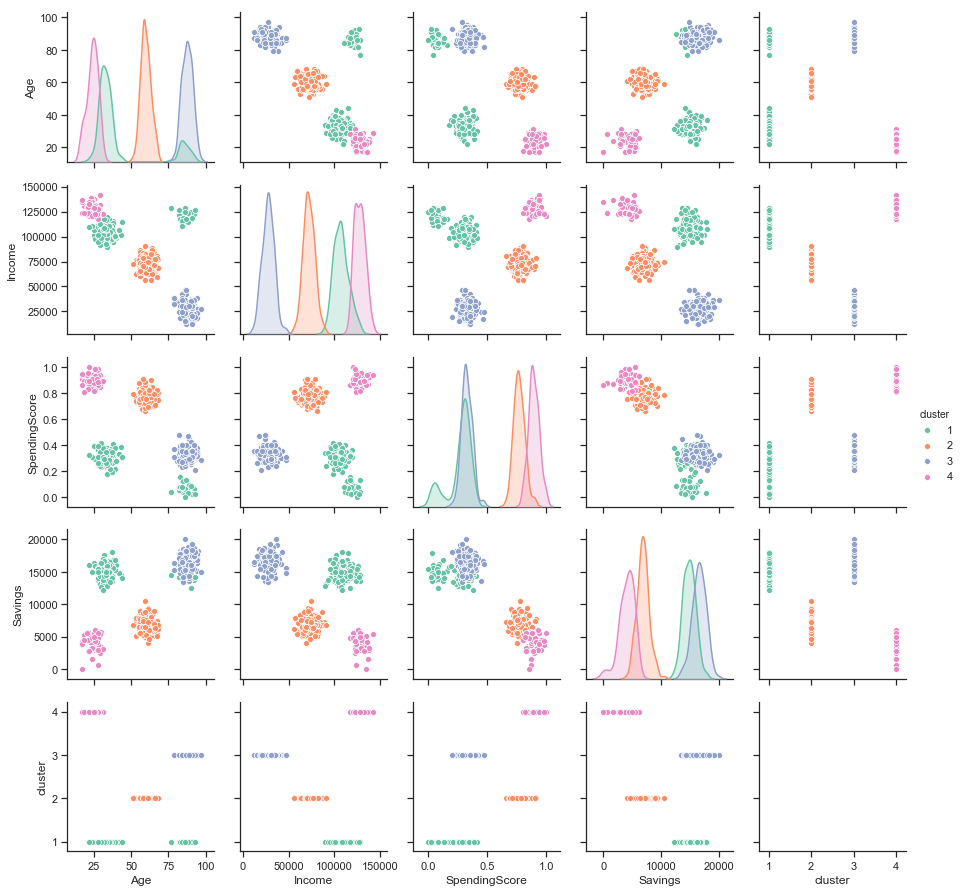

In [22]:
# We will now visualize our clustering. We will use the unscaled version of the data

#df_jc_scaled = pd.DataFrame(df_jc_scaled) This is the scaled version of the data. 

df_jc['cluster'] = y_kms_scaled + 1 # Adding the clustering results to the original data set, and rename them 1 to 4. 

sns.pairplot(df_jc, hue = 'cluster')

# As can be seen, the four clusters are very well defined. Moreover, there might be an argument that in fact perhaps
# 5 clusters will be even better because the "orange" cluster seems to be seems to have two subgroups as can be seen 
# from the plots on first row and first and last columns. 

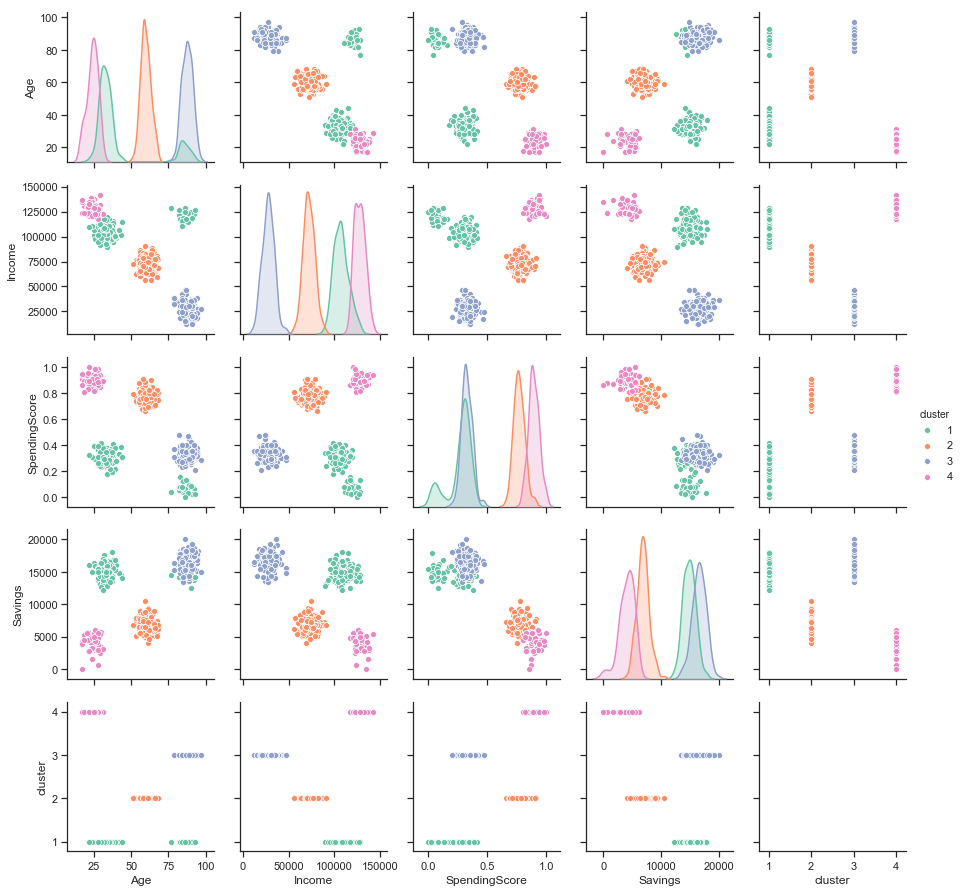

In [23]:
# Save the plot as png
sns_plot = sns.pairplot(df_jc, hue = 'cluster')
sns_plot.savefig("Jewelry_Clustering_plot_result_normalization_meth2.png")